In [26]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

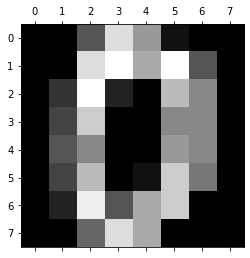

Image: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Label: [0 1 2 ... 8 9 8]


In [27]:
#Question 1
digi= load_digits()
plt.matshow(digi.images[0])
plt.show()

image = digi.images.reshape(digi.images.shape[0], -1)
label= digi.target
print("Image:",image)
print("Label:",label)

In [28]:
#Question 2
train_x, test_x, train_y, test_y = train_test_split(image, label, random_state=10, test_size=0.20)

log = LogisticRegression()
log.fit(train_x, train_y)

prediction = log.predict(test_x)

print("Accuracy Score:",metrics.accuracy_score(test_y, prediction))


Accuracy Score: 0.9583333333333334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
#Question 3
pca = PCA(n_components=10)
pca.fit(image)

pca.fit(train_x, train_y)
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

print("Variance Ratio:", pca.explained_variance_ratio_)


Variance Ratio: [0.14659533 0.13563025 0.11901049 0.08581575 0.05884243 0.04888293
 0.04350605 0.03691206 0.03334081 0.03064256]


In [31]:
#Question 4
log1 = LogisticRegression()
log1.fit(train_x, train_y)

predictedVals = log1.predict(test_x)

print("Variance Ratio:", metrics.accuracy_score(predictedVals, test_y))


Variance Ratio: 0.9333333333333333


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
#Question 5
conf = metrics.confusion_matrix(predictedVals, test_y)
Creport = metrics.classification_report(
    predictedVals, test_y)

print("Confusion Metrics")
print(conf)
print("Classfication Report")
print(Creport)

Confusion Metrics
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  1  1  0  2  1]
 [ 0  1 34  1  0  0  0  0  1  0]
 [ 0  0  0 37  0  0  0  0  1  0]
 [ 1  0  0  0 32  0  0  1  0  0]
 [ 0  1  0  0  0 29  0  0  2  2]
 [ 0  0  0  0  0  0 36  0  1  0]
 [ 0  0  0  1  0  0  0 39  0  0]
 [ 0  1  0  1  0  0  0  0 26  0]
 [ 0  0  0  0  2  2  0  0  0 36]]
Classfication Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.91      0.86      0.89        36
           2       1.00      0.92      0.96        37
           3       0.93      0.97      0.95        38
           4       0.94      0.94      0.94        34
           5       0.91      0.85      0.88        34
           6       0.97      0.97      0.97        37
           7       0.97      0.97      0.97        40
           8       0.79      0.93      0.85        28
           9       0.92      0.90      0.91        40

    accuracy                      